<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨‍💻Author: SOBIA ALAMGIR</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/sobiahashmi) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.linkedin.com/in/sobia-alamgir-a027b939/) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/sobia-alamgir-a027b939/)
<!-- [![Streamlit](https://img.shields.io/badge/Streamlit-Open%20App-FF4B4B?style=for-the-badge&logo=streamlit&logoColor=white)](https://predict-podcast-listening-time-fgkp77kmvwwpruyistfzhj.streamlit.app/) -->


<a id="13"></a>
<h1 style="background-color:#435420;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;color:#FF9900;">Sentiment Analysis on Amazon Product Reviews</h1>
<figcaption style="text-align: center;">
    <strong>
    </strong>
</figcaption>


**Objective:** Create a sentiment analysis classifier to label reviews as positive, neutral, or negative.

**Deliverables:**

- Preprocessing pipeline (tokenization, stopword removal)
- Labeled dataset and train/test sets
- Model training (Naive Bayes, LSTM, or BERT)
- Visualization of word clouds and confusion matrix

**Table of contents**<a id='toc0_'></a>    
  - [Step-01 Load Libraries](#toc1_1_)    
  - [Step-02 Load Dataset](#toc1_2_)    
  - [Step-03 Generate Dataframe for preprocessing](#toc1_3_)    
  - [Step-04 Data Preprocessing](#toc1_4_)    
    - [(i) Tokenization and Stopwords Removal](#toc1_4_1_)    
  - [Step-05 Feature Extraction](#toc1_5_)    
  - [Step-06 Splitting data into Training and Testing sets](#toc1_6_)    
  - [Step-07 Build and Train the Model](#toc1_7_)    
  - [Step-08 Save the model](#toc1_8_)    
  - [Step-09 Model Prediction](#toc1_9_)    
  - [Step-10 Model Evaluation](#toc1_10_)    
  - [Step-05 Visualize Sentiments counts](#toc1_11_)    
  - [Step-06 Generate Wordcloud](#toc1_12_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Step-01 Load Libraries](#toc0_)

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

from faker import Faker
import random

from wordcloud import WordCloud

import joblib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# !pip install nltk

## <a id='toc1_2_'></a>[Step-02 Load Dataset](#toc0_)

* **The Faker library is used to generate fake but realistic-looking data for testing and simulations.**
* **The underscore ( _ ) is a convention in Python used when the loop variable is not needed.**

In [34]:
fake = Faker()

reviews = [fake.text(max_nb_chars=200) for _ in range(5000)]

labels = [random.choice(['positive', 'neutral', 'negative']) for _ in range(5000)]
display(reviews)

['Hour debate interview. Adult piece else his different two mind.\nParent good speak play suddenly. My gun will might system human which. Involve fire hard technology low my.',
 'Travel plant second particular Congress. Interesting wonder use good let.',
 'High dog environmental full local identify understand. Candidate eye civil yeah. Throughout almost south politics another foreign be. Throw religious director image smile.',
 'Many maintain really take second. Also visit six book.\nWalk data national decade rest protect.',
 'Place sister usually spend property. Production fire religious water federal.\nIndeed when simple head ready whose. Yet site dog star sport first next condition.',
 'Her president never.\nThey pay think side compare news. Physical not Congress tonight significant shake.\nClear member argue eight much evidence behind. Prove film picture yard.',
 'Election he collection. Question strong call picture as series story.\nMovement population concern subject already phon

In [ ]:
# !pip install Faker

## <a id='toc1_3_'></a>[Step-03 Generate Dataframe for preprocessing](#toc0_)

In [ ]:
df = pd.DataFrame({'Review':reviews , 'Sentiment':labels})
display(df.head())
print(df.shape)

,Review,Sentiment
0,Hour debate interview. Adult piece else his di...,negative
1,Travel plant second particular Congress. Inter...,neutral
2,High dog environmental full local identify und...,neutral
3,Many maintain really take second. Also visit s...,neutral
4,Place sister usually spend property. Productio...,positive


(5000, 2)


## <a id='toc1_4_'></a>[Step-04 Data Preprocessing](#toc0_)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     5000 non-null   object
 1   Sentiment  5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


In [ ]:
df['Sentiment'].value_counts()

Sentiment
neutral     1722
positive    1677
negative    1601
Name: count, dtype: int64

### <a id='toc1_4_1_'></a>[(i) Tokenization and Stopwords Removal](#toc0_)

In [8]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to C:\Users\Sobia
[nltk_data]     Alamgir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Sobia
[nltk_data]     Alamgir\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to C:\Users\Sobia
[nltk_data]     Alamgir\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
stopwords_yes = set(stopwords.words('english'))
stopwords_yes

print(df['Review'][32])
df['Review'] = df['Review'].apply(
    lambda x: ' '.join(word.lower() for word in word_tokenize(x) if word.isalpha()))
print(df['Review'][32])

df['Review'] = df['Review'].apply(
     lambda x: ' '.join(word.lower() for word in x.split() if word not in stopwords_yes))
print(df['Review'][32])

Everything check little a long fall. Again race science own base participant including. Ball range positive leg industry collection. Size point such new leave hope various.
everything check little a long fall again race science own base participant including ball range positive leg industry collection size point such new leave hope various
everything check little long fall race science base participant including ball range positive leg industry collection size point new leave hope various


## <a id='toc1_5_'></a>[Step-05 Feature Extraction](#toc0_)

In [53]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Review'])

In [ ]:
X[0]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 23 stored elements and shape (1, 869)>

## <a id='toc1_6_'></a>[Step-06 Splitting data into Training and Testing sets](#toc0_)

In [50]:
df.columns

Index(['Review', 'Sentiment'], dtype='object')

In [ ]:
X_train , X_test , y_train, y_test = train_test_split(X , df['Sentiment'] , test_size=0.2 , random_state=42)

## <a id='toc1_7_'></a>[Step-07 Build and Train the Model](#toc0_)

In [56]:
model = MultinomialNB()
model.fit(X_train , y_train)

MultinomialNB()

In [ ]:
model_svm = SVC()
model_svm.fit(X_train , y_train)

SVC()

## <a id='toc1_8_'></a>[Step-08 Save the model](#toc0_)

In [68]:
joblib.dump(model , 'sentiment_model.pkl')
joblib.dump(model_svm, 'sentiment_model_svm.pkl')

['sentiment_model_svm.pkl']

In [ ]:
joblib.load('sentiment_model.pkl')
joblib.load('sentiment_model_svm.pkl')

SVC()

## <a id='toc1_9_'></a>[Step-09 Model Prediction](#toc0_)

In [ ]:
y_pred_nb = model.predict(X_test)
y_pred_svm = model_svm.predict(X_test)

## <a id='toc1_10_'></a>[Step-10 Model Evaluation](#toc0_)

In [ ]:
print("_______Naive Bayes_______")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print()
print("confusion_matrix:", confusion_matrix(y_test , y_pred_nb))
print()
print("Classification Report:", classification_report(y_test , y_pred_nb))

print()
print("_______Support Vector Machine_______")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
#print("AUC ROC:", roc_auc_score(y_test, y_pred_svm))
print()
print("confusion_matrix:", confusion_matrix(y_test , y_pred_svm))
print()
print("Classification Report:", classification_report(y_test , y_pred_svm))

_______Naive Bayes_______
Accuracy: 0.337

confusion_matrix: [[ 72 141 104]
 [ 85 149 121]
 [ 94 118 116]]

Classification Report:               precision    recall  f1-score   support

    negative       0.29      0.23      0.25       317
     neutral       0.37      0.42      0.39       355
    positive       0.34      0.35      0.35       328

    accuracy                           0.34      1000
   macro avg       0.33      0.33      0.33      1000
weighted avg       0.33      0.34      0.33      1000


_______Support Vector Machine_______
Accuracy: 0.326

confusion_matrix: [[ 76 138 103]
 [ 95 138 122]
 [ 98 118 112]]

Classification Report:               precision    recall  f1-score   support

    negative       0.28      0.24      0.26       317
     neutral       0.35      0.39      0.37       355
    positive       0.33      0.34      0.34       328

    accuracy                           0.33      1000
   macro avg       0.32      0.32      0.32      1000
weighted avg       

## <a id='toc1_11_'></a>[Step-05 Visualize Sentiments counts](#toc0_)

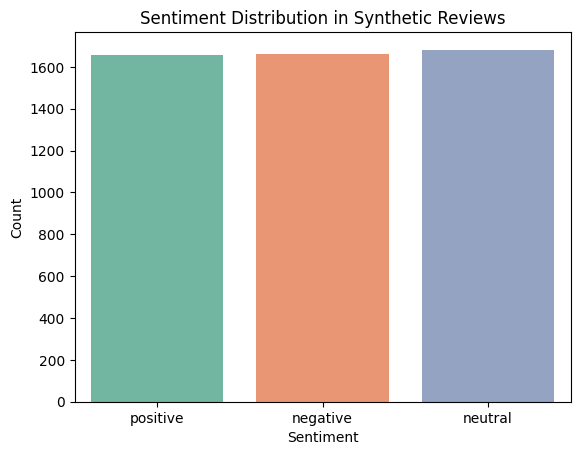

In [ ]:
sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title("Sentiment Distribution in Synthetic Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

## <a id='toc1_12_'></a>[Step-06 Generate Wordcloud](#toc0_)

In [ ]:
#!pip install wordcloud --quiet

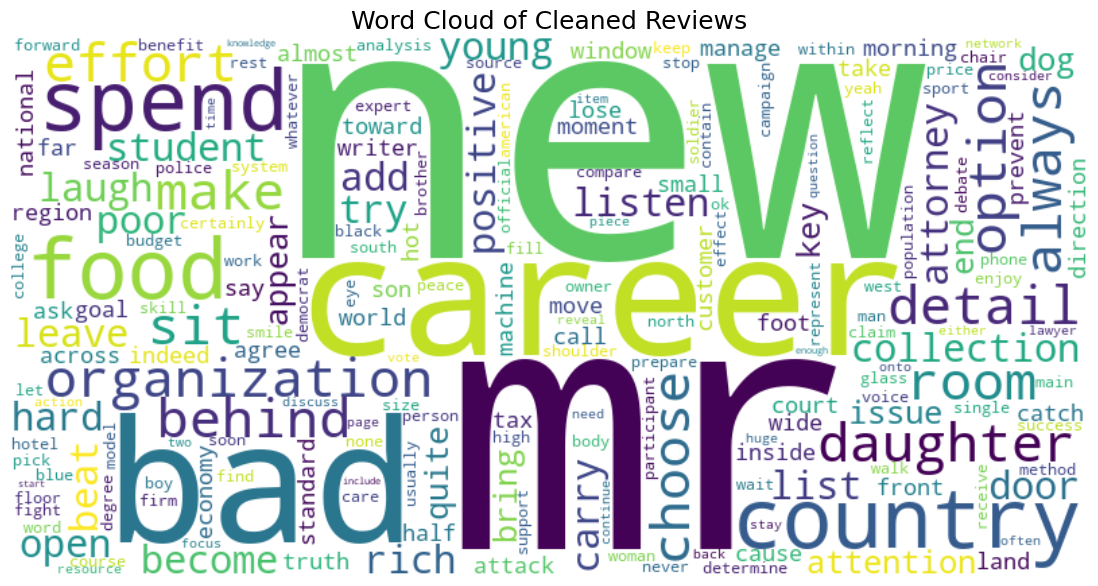

In [77]:
text = " ".join(df['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot it
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Cleaned Reviews", fontsize=18)
plt.show()


<a id="13"></a>
<h1 style="background-color:#435420;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;color:#FF9900;">Thankyou</h1>
<figcaption style="text-align: center;">
    <strong>
    </strong>
</figcaption>